Please **submit this Jupyter notebook through Canvas** no later than **Monday November 5 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

**Jordan Earle** (12297127)

**Natasja Wezel** (11027649)

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import math

-----
# Exercise 1
Let $P_k$ be the $k$th _Legendre polynomial_ (see paragraph 7.3.4) on $[-1, 1]$.

We know that $P_0(x) = 1$, $P_1(x) = x$, and that $P_k$ satisfy the recurrence relation 

$$k P_k(x) =x (2k-1)  P_{k-1}(x) - (k-1) P_{k-2}(x).$$

We will use [_induction_](https://en.wikipedia.org/wiki/Mathematical_induction) to show that the derivatives of the Legendre polynomials satisfy

$$P_k'(1) = k(k+1)/2.$$

## (a) Base case
Show that $P_0'(1) = 0$ and $P_1'(1) = 1$.

$$\frac{dP_0(x)}{dx} = 1 \frac{d}{dx} = 0$$
$$\frac{dP_1(x)}{dx} = x \frac{d}{dx} = 1$$

I think this is wrong cause it seems too easy.

$$P_k'(1) = k(k+1)/2$$ when k = 0 $$P_k'(1) = 0(0+1)/2 = 0$$ and when k = 1, $$P_k'(1) = 1(1+1)/2 = 1$$

## (b)  Induction Step
Let $k \geq 2$. Use the recurrence relation to show that $P_k'(1) = k(k+1)/2$.

$$kP'_{k}(x) = (x(2k-1)P'_{k-1}(x) + (2k-1)P_{k-1}(x)) - (k-1)P'_{k-2}(x)$$

pg 322 shows that $$P_k(1) = 1$$

evaluation at k = n, x = 1:

$$nP'_{n}(1) = (1(2n-1)P'_{n-1}(1) + (2n-1)P_{n-1}(1)) - (n-1)P'_{n-2}(1) \to $$

$$P'_{n}(1) = \frac{(2n-1)P'_{n-1}(1) + (2n-1)P_{n-1}(1)) - (n-1)P'_{n-2}(1)}{n}$$

$$P'_{n}(1) = \frac{(2n-1)P'_{n-1}(1) + (2n-1) - (n-1)P'_{n-2}(1)}{n}$$

Substituting in that n = 2, we find that:

$$P'_{2}(1) = \frac{(4-1)P'_{2-1}(1) + (4-1) - (2-1)P'_{2-2}(1)}{2} \to P'_{2}(1) = \frac{(3)P'_{1}(1) + (3) - (1)P'_{0}(1)}{2}$$

knowing that $P_0'(1) = 0$ and $P_1'(1) = 1$:

$$P'_{3}(1) \frac{(3) + (3)}{2} = 3$$

unsing the theorm above:

$$P_2'(1) = 2(2+1)/2 = 3$$

This shows that for 2, it holds true, so if we step forward by another 1, we would have:

$$P'_{2+1}(1) = \frac{(2(2+1)-1)P'_{(2+1)-1}(1) + (2(2+1)-1) - ((2+1)-1)P'_{(2+1)-2}(1)}{3}$$

$$P'_{3}(1) = \frac{(5)P'_{2}(1) + (5) - (2)P'_{1}(1)}{3}$$

$$P'_{3}(1) = \frac{18}{3} = 6$$

and the theorm above: 

$$P_3'(1) = 3(3+1)/2 = 6$$

The above shows it is true for the first 4 steps(0-3) that it hold: now assuming that:

$$P'_{n-2}(1) = (n-2)(n-1)/2 $$

$$P'_{n-1}(1) = n-1(n)/2 $$


$$P'_{n}(1) = \frac{(2n-1)P'_{n-1}(1) + (2n-1) - (n-1)P'_{n-2}(1)}{n}$$

and substituting into the equation

----------------

# Exercise 2

A bacterial population $P$ grows according to the goemetric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

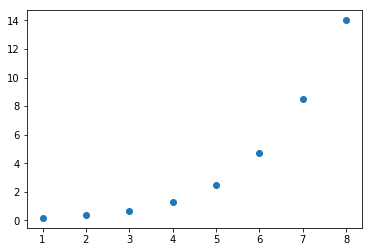

In [51]:
data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]

plt.scatter(range(1,9), data)

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$.

$$
\frac{df}{dx_1} = x_2^t\\
\frac{df}{dx_2} = x_1 t x_2^{t-1}
$$

In [52]:
import numpy as np

x = np.random.rand(1,2)
r = np.zeros((len(data),1))

print(x[0][0])

J = np.zeros((len(data),2))

for i in range(0,10):
    for t in range(1, len(data)):
        J[t][0] = x[0][1]**t
        J[t][1] = t*x[0][0]*(x[0][1]**(t-1))
        r[t][0] = -1*(data[t] - x[0][0]*(x[0][1]**(t)))
        
    print(J, r)
    s = np.linalg.solve(J, r)
    x += s

0.9692730400715494
[[0.00000000e+00 0.00000000e+00]
 [1.63614752e-01 9.69273040e-01]
 [2.67697872e-02 3.17174737e-01]
 [4.37993211e-03 7.78416991e-02]
 [7.16621508e-04 1.69814004e-02]
 [1.17249851e-04 3.47300954e-03]
 [1.91838053e-05 6.81882715e-04]
 [3.13875355e-06 1.30160417e-04]] [[  0.        ]
 [ -0.20141263]
 [ -0.66405277]
 [ -1.29575465]
 [ -2.4993054 ]
 [ -4.69988635]
 [ -8.49998141]
 [-13.99999696]]


LinAlgError: Last 2 dimensions of the array must be square

# (b)
By using logarithms to transform the equations, a fit to these data can also be done by linear least squares. Perform such a linear least squares fit to obtain estimates for $P_0$ and $r$, and compare your results with those for the nonlinear fit. Put the corresponding functions in a picture together with the data points and briefly discuss the results.

----------------------
# Exercise 3



Runge's function is given by

$$ f(t) = 1/(1+25t^2).$$

In [57]:
def make_polynomial(n, x, c):
    y = 0
    for i in range(n + 1):
        y += c[i] * x **i
    return y

def runge_function(x):
    return 1 / (1 + 25 * x**2)

# (a)
Interpolate Runge's function on $[-1,1]$ by a polynomial $p_k$ of degree $k$ for $k = 5,10,15$. Use equally spaced interpolation points. Draw your interpolating polynomials together with $f$.

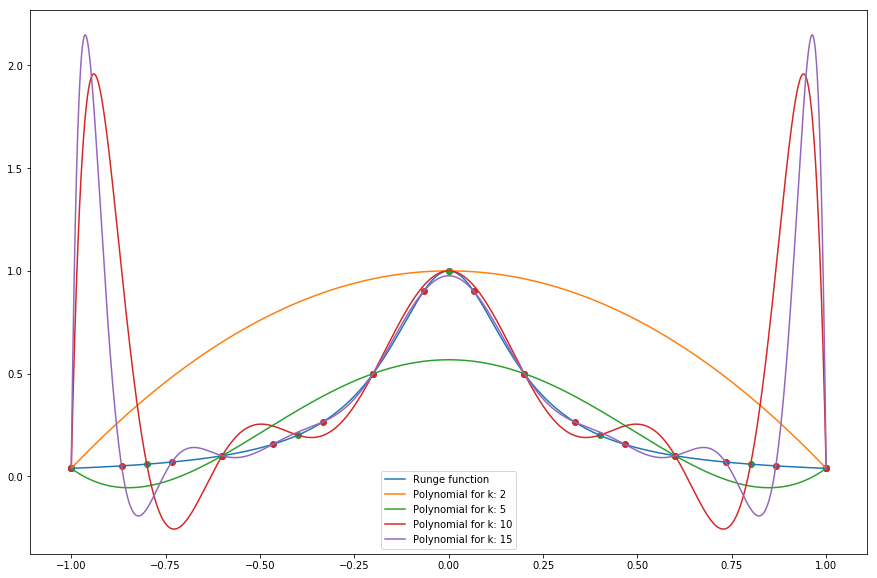

In [58]:
# proper linspace
x = np.linspace(-1, 1, 2000)

y = []
# generate some data points
for point in x:
    y.append(runge_function(point))
plt.figure(figsize=(15,10))

plt.plot(x,y, label="Runge function")    

k_list = [2,5,10,15]

for k in k_list:
    # proper linspace
    x = np.linspace(-1, 1, k+1)

    k_points = []
    # generate some data points
    for point in x:
        test = runge_function(point)
        k_points.append(test)
    plt.scatter(x,k_points)
    k_points = np.array(k_points)    
    
    # so let's use y as datapoints for the polynomial estimation
    # take regular monomials as basis
    phi = np.ones((len(x), len(x)))
    
    # set up Vandermonde matrix for basis function
    for i in range(0, len(x)):
        for j in range(0, len(x)):
            phi[i][j] = x[i]**j
    
    # calculate coefficients
    coefficients = np.linalg.solve(phi, k_points)
    
    # plot 
    time_steps = np.linspace(-1, 1, 200000)

    values = []

    for t in time_steps:
        values.append(make_polynomial(k, t, coefficients))
    
    label = "Polynomial for k: " + str(k)
    plt.plot(time_steps,values, label=label)    

plt.legend()

# (b)
Repeat (a) to find polynomials $q_k$. This time use the Chebyshev points as interpolation points. They are given by

$$t_i = \cos \left( \frac{(2i-1)\pi}{2k+2} \right),\, \,i = 1,\ldots,k+1.$$

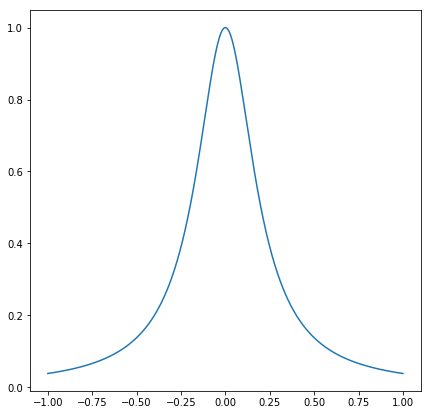

<Figure size 432x288 with 0 Axes>

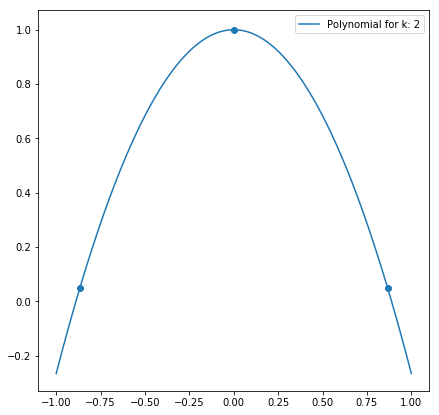

<Figure size 432x288 with 0 Axes>

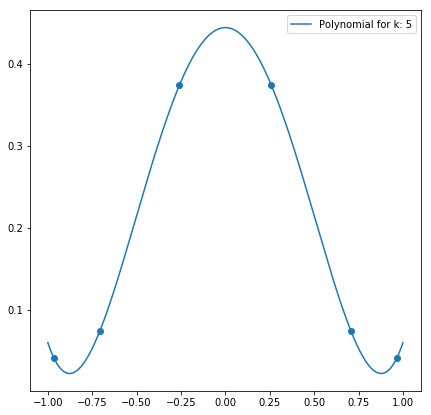

<Figure size 432x288 with 0 Axes>

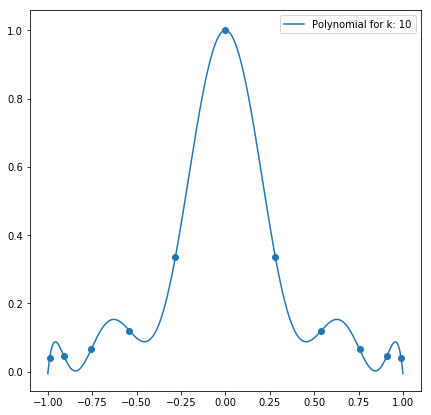

<Figure size 432x288 with 0 Axes>

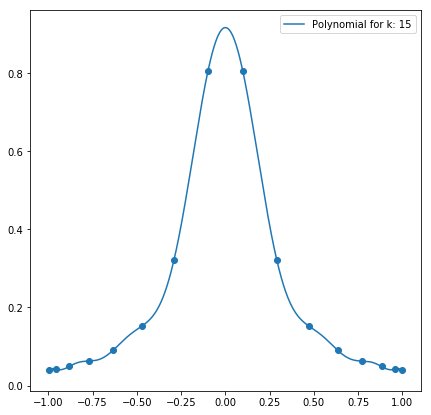

<Figure size 432x288 with 0 Axes>

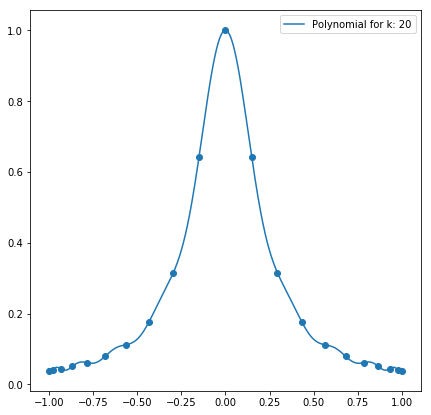

<Figure size 432x288 with 0 Axes>

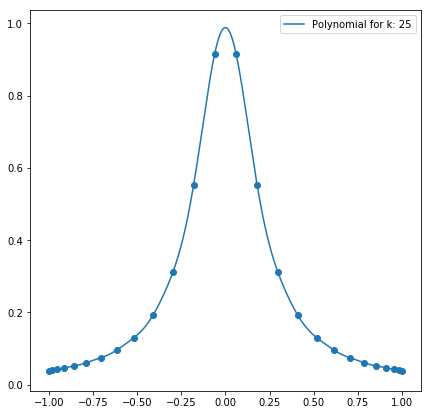

In [60]:
# proper linspace
x = np.linspace(-1, 1, 2000)

y = []
# generate some data points
for point in x:
    y.append(runge_function(point))

plt.figure(figsize=(7,7))

plt.plot(x,y, label="Runge function")    

k_list = [2, 5, 10, 15, 20, 25]

for k in k_list:
    
    
    x = []
    for i in range(1, k+2):
        x.append(math.cos(((2*i -1) * math.pi)/(2*k+2)))

    # generate some data points
    y = []
    for point in x:
        test = runge_function(point)
        y.append(test)

    y = np.array(y)    
    
    # so let's use y as datapoints for the polynomial estimation
    # take regular monomials as basis
    phi = np.ones((len(x), len(x)))
    
    # set up Vandermonde matrix for basis function
    for i in range(0, len(x)):
        for j in range(0, len(x)):
            phi[i][j] = x[i]**j
    
    # calculate coefficients
    coefficients = np.linalg.solve(phi, y)
    
    # plot 
    time_steps = np.linspace(-1, 1, 200000)

    values = []

    for t in time_steps:
        values.append(make_polynomial(k, t, coefficients))
    
    plt.figure(k)
    plt.figure(figsize=(7,7))
    label = "Polynomial for k: " + str(k)
    plt.scatter(x, y)
    plt.plot(time_steps,values, label=label)    
    plt.legend()


# (c)
Verify numerically that the maximum of the difference of $f$ and $q_k$ in the interval $[-1,1]$ decreases with increasing $k$ by trying various values of $k$.